# [Predict Future Sales - Kaggle](https://www.kaggle.com/c/competitive-data-science-predict-future-sales)

* [How to Win a Data Science Competition: Learn from Top Kagglers - Coursera](https://www.coursera.org/learn/competitive-data-science)
* 위의 코세라 코스에 있는 데이터 사이언스 경진대회에서 우승하는 방법이라는 강좌와 관련된 경진대회다.
* 일단위로 판매되는 데이터의 시계열 분석을 다루고 있다.
* [1C Company](http://1c.ru/eng/title.htm)라는 러시아의 큰 소프트웨어 회사의 데이터이다.
* 1C Company는 경영 회계, 재무 회계, 인사 관리, CRM, SRM, MRP, MRP 등과 같은 다양한 비즈니스 업무를 하고있다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

%matplotlib inline

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%ls data

item_categories.csv*      sales_train.csv.gz*       shops.csv*
items.csv*                sample_submission.csv.gz* test.csv.gz*


In [3]:
sales_train = pd.read_csv('data/sales_train.csv.gz', compression='gzip')
test = pd.read_csv('data/test.csv.gz', compression='gzip')
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
submissions = pd.read_csv('data/sample_submission.csv.gz', compression='gzip')
print(sales_train.shape)
print(test.shape)
print(item_categories.shape)
print(items.shape)
print(shops.shape)
print(submissions.shape)

(2935849, 6)
(214200, 3)
(84, 2)
(22170, 3)
(60, 2)
(214200, 2)


In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
submissions.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

train데이터에는 2013년 1월부터 2015년 10월까지의 데이터가 있다.<br>
test데이터로 2015년 11월 shop과 product 정보를 예측해야 한다.<br>
`sample_submission.csv.gz` 파일을 보면 item_cnt_month 를 예측하게 되어있다.

In [8]:
[c for c in sales_train.columns if c not in test.columns]

['date', 'date_block_num', 'item_price', 'item_cnt_day']

In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
%%time 
monthly_sales = sales_train.groupby([
    "date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg(
    {"date":["min",'max'], "item_price":"mean", "item_cnt_day":"sum"})

CPU times: user 4min 3s, sys: 1.87 s, total: 4min 5s
Wall time: 4min 6s


In [12]:
monthly_sales.head(20)

date             item_price item_cnt_day
                                       min         max       mean          sum
date_block_num shop_id item_id                                                
0              0       32       03.01.2013  31.01.2013      221.0          6.0
                       33       03.01.2013  28.01.2013      347.0          3.0
                       35       31.01.2013  31.01.2013      247.0          1.0
                       43       31.01.2013  31.01.2013      221.0          1.0
                       51       13.01.2013  31.01.2013      128.5          2.0
                       61       10.01.2013  10.01.2013      195.0          1.0
                       75       17.01.2013  17.01.2013       76.0          1.0
                       88       16.01.2013  16.01.2013       76.0          1.0
                       95       06.01.2013  06.01.2013      193.0          1.0
                       96       10.01.2013  10.01.2013       70.0          1.0
                       98       04.01.2013  31.01.2013      268.0         25.0
                       111      17.01.2013  17.01.2013       89.0          1.0
                       149      11.01.2013  28.01.2013       99.0          3.0
                       151      16.01.2013  16.01.2013       75.0          1.0
                       153      09.01.2013  09.01.2013      258.0          1.0
                       198      10.01.2013  10.01.2013      112.0          1.0
                       210      05.01.2013  25.01.2013      118.0          2.0
                       282      04.01.2013  04.01.2013      109.0          1.0
                       306      22.01.2013  22.01.2013       59.0          1.0
                       351      21.01.2013  21.01.2013       89.0          1.0

In [13]:
items.item_category_id.head()

0    40
1    76
2    40
3    40
4    40
Name: item_category_id, dtype: int64

In [14]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Text(0.5,1,'Number of products sold per day')

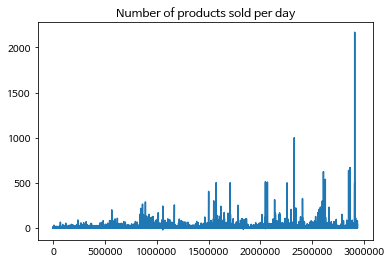

In [15]:
sales_train.item_cnt_day.plot()
plt.title("Number of products sold per day")

Text(0.5,1,'Item Price Distribution')

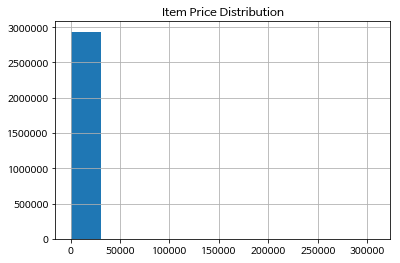

In [16]:
sales_train.item_price.hist()
plt.title("Item Price Distribution")

In [17]:
# 카테고리별 아이템 수 
x = items.groupby(['item_category_id']).count()
x = x.sort_values(by='item_id', ascending=False)
x = x.iloc[0:10].reset_index()
x

,item_category_id,item_name,item_id
0,40,5035,5035
1,55,2365,2365
2,37,1780,1780
3,31,1125,1125
4,58,790,790
5,30,756,756
6,72,666,666
7,19,628,628
8,61,598,598
9,23,501,501


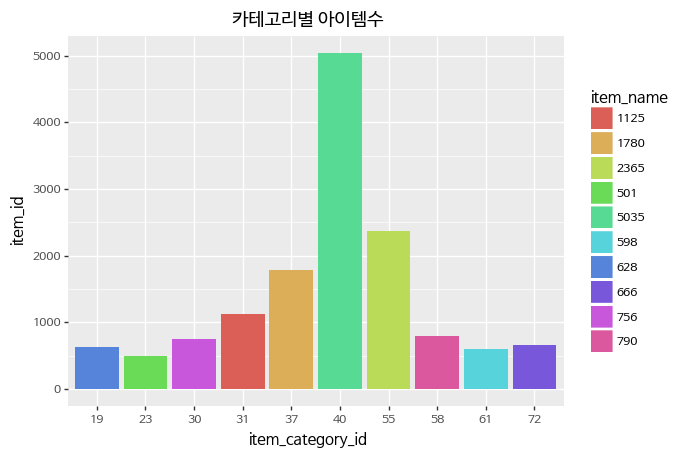

<ggplot: (309242758)>

In [18]:
x['item_category_id'] = x['item_category_id'].astype(str)
x['item_name'] = x['item_name'].astype(str)
(ggplot(x)
 + aes(x='item_category_id', y='item_id', fill='item_name')
 + geom_bar(stat = "identity")
 + ggtitle('카테고리별 아이템수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [19]:
ts = sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
ts = pd.DataFrame(ts).reset_index()

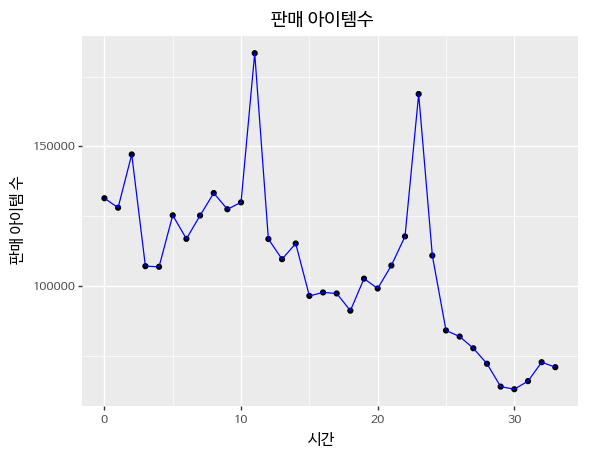

<ggplot: (-9223372036546343869)>

In [21]:
(ggplot(ts)
 + aes(x='date_block_num', y='item_cnt_day')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='판매 아이템 수', title='판매 아이템수')
 + theme(text=element_text(family='NanumBarunGothic'))
)